<span style="color:blue">
In this data analytics project, we will be working with a large dataset to analyze and uncover insights about our target audience. The goal of this project is to gain a deeper understanding of our visitors and their behavior, which will help us make informed decisions about our marketing and engagement strategies.

Dataframe:

The dataset we will be working with consists of information about our visitors, including their demographic information, website usage patterns, and purchase history. The data is organized into a Pandas dataframe, which is a powerful tool for working with and analyzing large datasets in Python.

Task Decomposition:

To tackle this complex project, we will decompose it into smaller, more manageable sub-tasks. This will help us to focus on specific aspects of the project, understand the data better, and make progress in parallel. Our task decomposition will include the following steps:

- Data cleaning and preparation: In this step, we will clean and prepare the data for analysis. This may involve removing missing or duplicate values, transforming variables, and creating new features.

- Exploratory data analysis: In this step, we will explore the data and generate initial insights. This will include visualizing the data, identifying relationships and patterns, and performing basic statistical tests.

- Hypothesis testing: In this step, we will formulate and test hypotheses about our target audience. This will involve identifying important variables and conducting more advanced statistical tests to confirm or reject our hypotheses.

- Data visualization: In this step, we will create visualizations to communicate our insights. This will include creating interactive dashboards, generating reports, and presenting our findings to stakeholders.

By breaking down the project into smaller tasks, we will be able to focus on each step and make progress in a structured and organized way. This will help us to deliver high-quality results and achieve our goals.
    
</span>


In [1]:
#Importing the necesary functions 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
import scipy.stats as stats

In [2]:
#Importing the Hypotheses files and calling it hypotheses
hypotheses = pd.read_csv('moved_hypotheses_us.csv',sep=';')
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [3]:
#Importing the Orders files and calling it orders
orders = pd.read_csv('moved_orders_us.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [4]:
#Importing the Visits files and calling it visits
visits = pd.read_csv('moved_visits_us.csv')
visits.head(2)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619


## Preprocessing The Data 

In [5]:
#Changing the date to datetime format 
orders['date'] = pd.to_datetime(orders['date'], format="%Y-%m-%d %H:%M")
visits['date'] = pd.to_datetime(visits['date'], format="%Y-%m-%d %H:%M")
hypotheses.columns = hypotheses.columns.str.lower()
pd.options.display.max_colwidth = 210

In [6]:
#Checking for missing values in the orders table 
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [7]:
#Checking for missing values in the visits table 
visits.isna().sum()

date      0
group     0
visits    0
dtype: int64

In [8]:
#Checking for missing values in the hypotheses table 
hypotheses.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64

## Part 1. Prioritizing Hypotheses


### Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [9]:
#calculating the ICE framework and sorting from highest to lowest displaying priority
hypotheses['ICE'] = ((hypotheses.impact * hypotheses.confidence ) / hypotheses.effort).round(2)
hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.20
0,Add two new channels for attracting traffic. This will bring 30% more users,13.33
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.20
6,Show banners with current offers and sales on the main page. This will boost conversion,8.00
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.00
1,Launch your own delivery service. This will shorten delivery time,2.00
5,Add a customer review page. This will increase the number of orders,1.33
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.12
4,Change the background color on the main page. This will increase user engagement,1.00


### Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [10]:
#calculating the RICE framework and sorting from highest to lowest displaying priority
hypotheses['RICE'] = (hypotheses.reach * hypotheses.impact * hypotheses.confidence) / hypotheses.effort
hypotheses[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


### Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.


In [11]:
#Displaying the diffrent prioritization of RICE and ICE 
hypotheses[['hypothesis','RICE','ICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE,ICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0,11.20
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0,7.00
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0,13.33
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0,8.00
8,Launch a promotion that gives users discounts on their birthdays,16.2,16.20
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0,1.12
1,Launch your own delivery service. This will shorten delivery time,4.0,2.00
5,Add a customer review page. This will increase the number of orders,4.0,1.33
4,Change the background color on the main page. This will increase user engagement,3.0,1.00


<span style="color:blue">
The RICE and ICE methods were used to prioritize the hypotheses. The ICE method prioritized hypothesis number 8, "Launch a promotion that gives users discounts on their birthdays," while the RICE method prioritized hypothesis number 7, "Add a subscription form to all the main pages." The reason for this discrepancy is that the RICE method takes 'impact' into account, while the ICE method leaves it out. The impact parameter shows how strongly a change impacts users who are reached, and it was a key factor in prioritizing hypothesis number 7. Based on these findings, it is recommended to focus on hypothesis number 7 and implement the subscription form on all the main pages to compile a mailing list. This is expected to have a stronger impact on users and help drive business growth.</span> 

## Part 2. A/B Test Analysis

In [12]:
#Checking the start date of the test 
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [13]:
#Checking the end date of the test 
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [14]:
#The distribution of the numbers of users in group A
number_of_usersA = orders[orders['group']=='A']['visitorId'].count()
number_of_usersA

557

In [15]:
#The distribution of the numbers of users in group B
number_of_usersB = orders[orders['group']=='B']['visitorId'].count()
number_of_usersB

640

In [16]:
usersB = orders[orders['group'] == 'B']
usersA = orders[orders['group'] == 'A']

In [17]:
#A function to find the visitorIds that are associated with both groups.
def check_common_visitorIds(usersA, usersB):
    visitor_A = set(usersA['visitorId'].unique())
    visitor_B = set(usersB['visitorId'].unique())
    common_visitorIds = visitor_A.intersection(visitor_B)
    if len(common_visitorIds) > 0:
        print("Visitor IDs associated with both groups A and B:", common_visitorIds, len(common_visitorIds))


In [18]:
#running the function
result = check_common_visitorIds(usersA, usersB)
result

Visitor IDs associated with both groups A and B: {3957174400, 3984495233, 2780786433, 1294878855, 1648269707, 1614305549, 4120364173, 232979603, 199603092, 4266935830, 2712142231, 2587333274, 2716752286, 3891541246, 1668030113, 2654030115, 3234906277, 1230306981, 1404934699, 3803269165, 2949041841, 237748145, 457167155, 2927087541, 1738359350, 3062433592, 3656415546, 818047933, 393266494, 963407295, 471551937, 2579882178, 3202540741, 2686716486, 1333886533, 2044997962, 3941795274, 1801183820, 2378935119, 4256040402, 4069496402, 3766097110, 8300375, 351125977, 1602967004, 276558944, 2038680547, 3951559397, 3963646447, 4186807279, 3717692402, 1959144690, 2458001652, 2600415354, 2954449915, 1316129916, 477780734, 3972127743} 58


<span style="color:blue">
The timespan of the A/B test is August 1 to the 31 of 2019. There are 557 users in group A and 640 in group B. There are 58 users who are in both groups A and B, I am not gonna change the data fram for the time because removing 58 users would drastically change the data.</span> 

### Graph cumulative revenue by group. Make conclusions and conjectures.

In [19]:
datesGroups = orders[['date','group']].drop_duplicates()

In [20]:
#Creating a table that groups the date based on date and group 
#then aggregates to get the number of transactions and customers and the total revenue
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group']))
ordersAggregated.head(2)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0


In [21]:
#Creating a table that groups based on date and group then aggreagates to get the number of visits per day/group
visitorsAggregated = (
    datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group']))
visitorsAggregated.head(2)

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713


In [22]:
#Merging the two table together and renaming the columns 
cumulative_data = ordersAggregated.merge(visitorsAggregated, left_on=['date','group'], right_on=['date','group'])
cumulative_data.columns = ['date','group', 'orders', 'buyers', 'revenue', 'visits']

In [23]:
cumulative_data.head(2)

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713


In [24]:
#DataFrame with cumulative revenue by day, group A
cumulativeRevenueA = cumulative_data[cumulative_data['group']=='A'][['date','revenue','orders']]

#DataFrame with cumulative revenue by day, group B
cumulativeRevenueB = cumulative_data[cumulative_data['group']=='B'][['date','revenue','orders']]

In [25]:
cumulativeRevenueB.head(10)

,date,revenue,orders
1,2019-08-01,1620.0,21
3,2019-08-02,4243.8,45
5,2019-08-03,6050.6,61
7,2019-08-04,7767.9,78
9,2019-08-05,9262.9,101
11,2019-08-06,13069.3,129
13,2019-08-07,16600.8,153
15,2019-08-08,20088.6,180
17,2019-08-09,22646.7,205
19,2019-08-10,24367.1,228


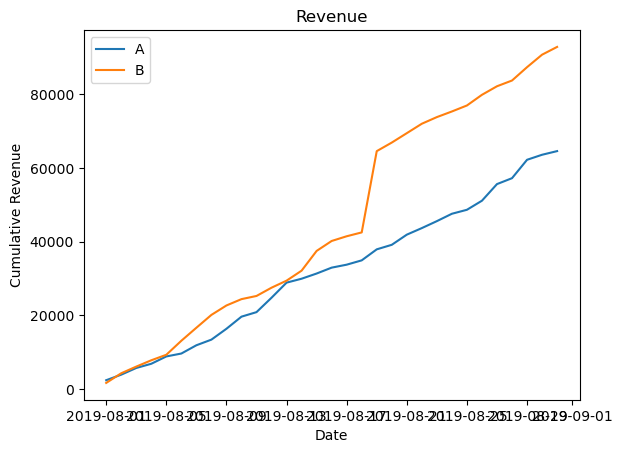

In [26]:
#plotting the group A and B revenue graph
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.rcParams["figure.figsize"] = (18,3)
plt.xlabel("Date")
plt.ylabel("Cumulative Revenue")
plt.title('Revenue')
plt.legend()
plt.show()

<span style="color:blue">Group A had a steady rise in revenue while group B had a hugh boost around the 18th.  </span>



### Graph cumulative average order size by group. Make conclusions and conjectures.


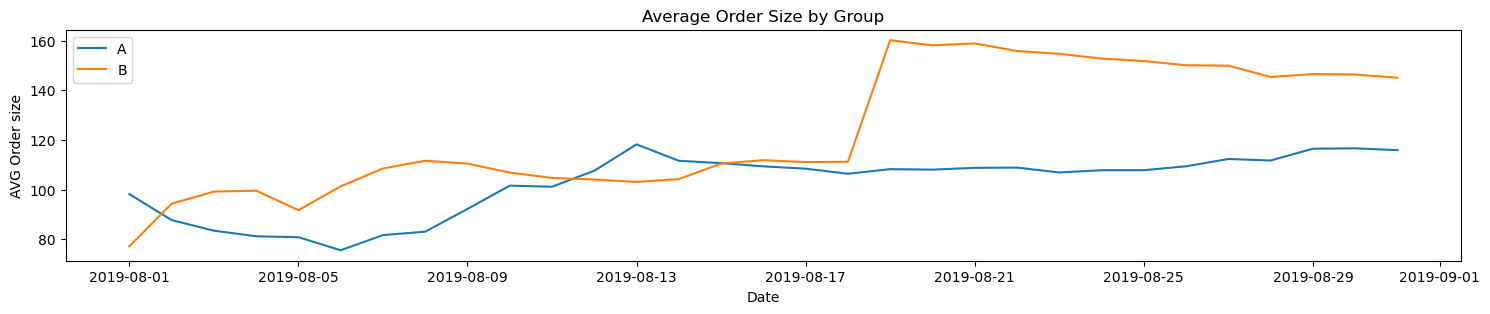

In [27]:
#plotting the group A and B average order size graph
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.rcParams["figure.figsize"] = (18,5)
plt.xlabel("Date")
plt.ylabel("AVG Order size")
plt.title('Average Order Size by Group')
plt.legend()
plt.show()

<span style="color:blue">Group B had a hugh rise in avg order size between the 17th and the 18th meaning they had some really large orders on those days and not as many buyers but then didnt jump back down, the large purchases continued. </span>


### Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

In [28]:
#Merging the data into one data frame 
mergedCumulativeRevenue = (cumulativeRevenueA
                           .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A','B']))

In [29]:
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2356.8,24,1620.0,21
1,2019-08-02,3860.3,44,4243.8,45
2,2019-08-03,5675.5,68,6050.6,61
3,2019-08-04,6822.1,84,7767.9,78
4,2019-08-05,8810.2,109,9262.9,101


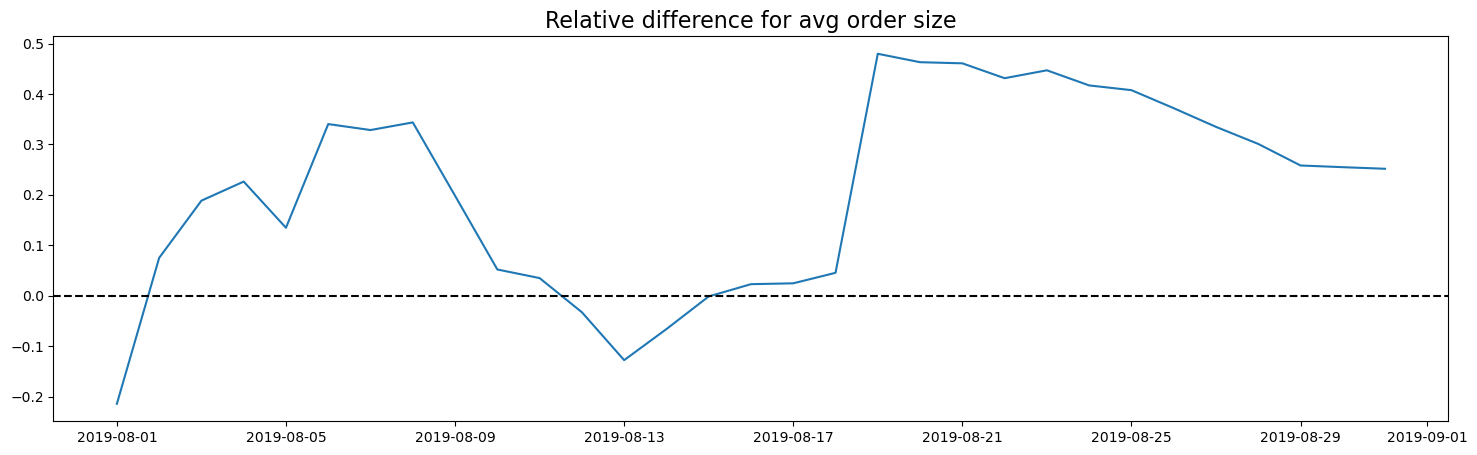

In [30]:
#Plotting the relative difference in cumulative average order size for group B compared with group A
plt.plot(mergedCumulativeRevenue['date'], 
        (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / 
        (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.rcParams["figure.figsize"] = (20,3)
plt.title('Relative difference for avg order size', fontdict={'size':16})
plt.show()

<span style="color:blue"> 

At several points the difference between the segments spikes. This means there must be some big orders and outliers! </span>

### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.


In [31]:
cumulative_data.head(1)

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,24,20,2356.8,719


In [32]:
#Calculating cumulative conversion
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['buyers']

In [33]:
#selecting data on group A
cumulativeDataA = cumulative_data[cumulative_data['group']=='A']
#selecting data on group B
cumulativeDataB = cumulative_data[cumulative_data['group']=='B']

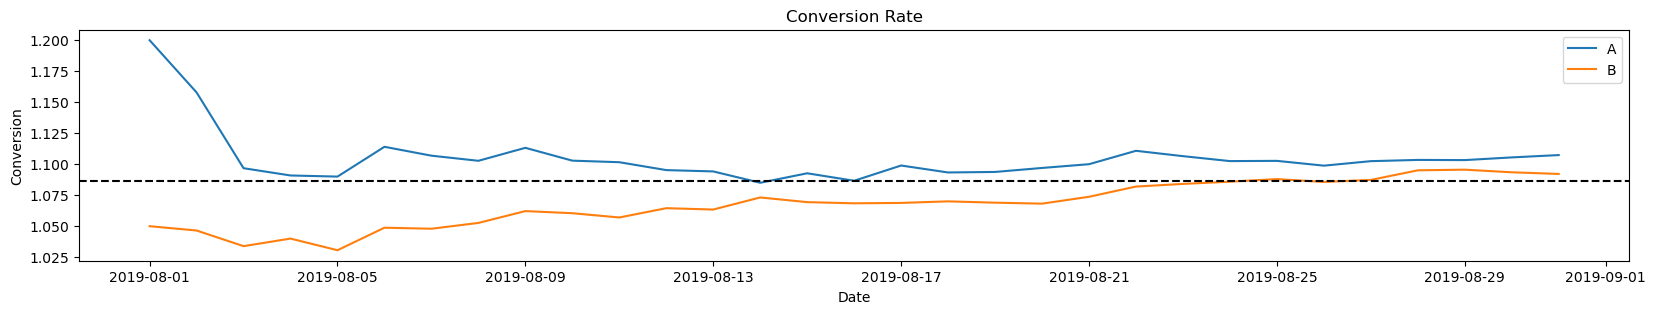

In [34]:
#Plotting the conversion rates for group A and B over time 
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.rcParams["figure.figsize"] = (20,3)
plt.xlabel("Date")
plt.ylabel("Conversion")
plt.title('Conversion Rate')
plt.axhline(y=cumulative_data['conversion'].mean(), color='black', linestyle='--')
plt.legend()
plt.show()

In [35]:
#overall conversion Group A:
cumulativeDataA['buyers'].sum()/cumulativeDataA['orders'].sum()

0.9081157221800845

In [36]:
#overall conversion Group B:
cumulativeDataB['buyers'].sum()/cumulativeDataB['orders'].sum()

0.9284349321612841

<span style="color:blue">Group A started out with a really high conversion rate which quickly dropped then stayed pretty steady. Group B had a small decrese in the first few days of teh test but then had a steady increase throughout the test. Group A conversion rate was 91% and Group B was 93%</span>


### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures

In [37]:
#Creating a table with the number of orders per unique customer 
orders_per_user = orders.groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
orders_per_user.columns = ['userId','purchases']
orders_per_user.head(2)

,userId,purchases
0,5114589,1
1,6958315,1


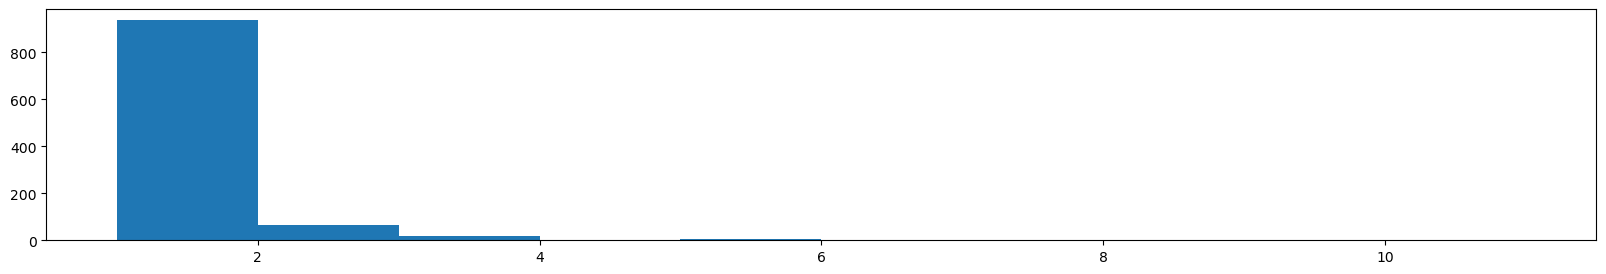

In [38]:
#distribution histogram with the number of orders per user.
plt.hist(orders_per_user['purchases'])
plt.show()

In [39]:
orders_per_user['purchases'].describe()

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: purchases, dtype: float64

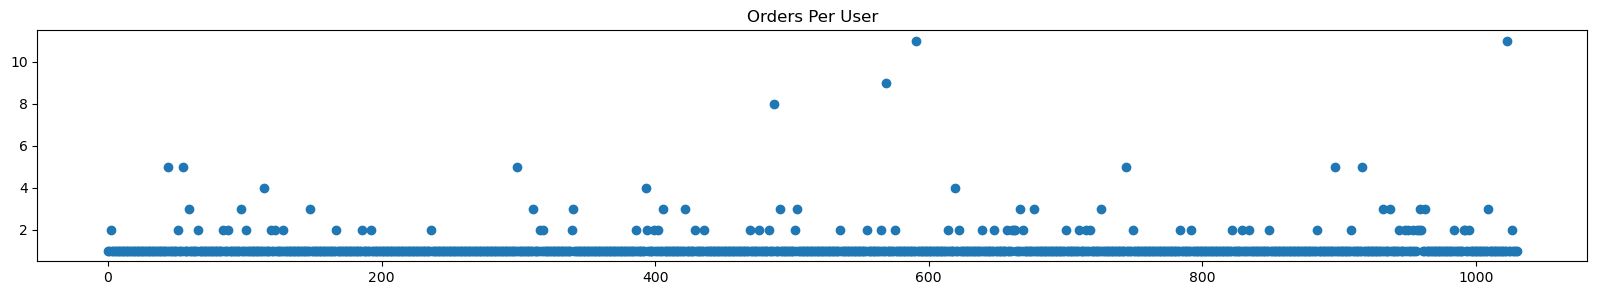

In [40]:
#Plotting a scatter plot to visualize how many orders there are per user 
x_values = pd.Series(range(0,len(orders_per_user)))
plt.scatter(x_values,orders_per_user['purchases'])
plt.title("Orders Per User")
plt.show()

<span style="color:blue">Looks like we have a couple of serious outliers while it looks like most people made less than two purchases there are some outliers who made more than 8 and evene some that made more than ten.</span>

### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [41]:
#Calculating the number of orders for the 95th and 99th percentile. 
print(np.percentile(orders_per_user['purchases'], [95,99]))

[2. 4.]


<span style="color:blue">No more than 5% of customers made more than 2 purchases And no more than 1% made more than 4 purchases. I would conclude that cutomers who made more than 2 orders are anomolies.</span>

### Plot a scatter chart of order prices. Make conclusions and conjectures.

In [42]:
orders.revenue.describe()

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

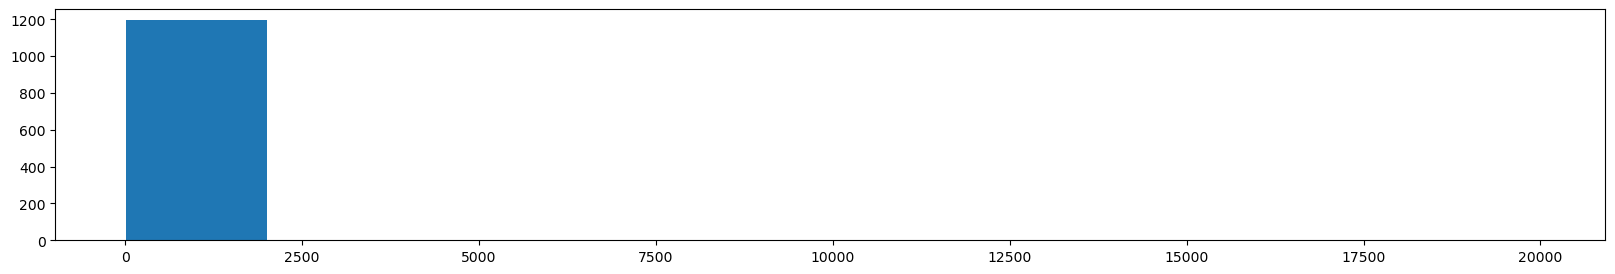

In [43]:
#distribution histogram with the price of orders.
plt.hist(orders['revenue'])
plt.show()

<AxesSubplot:xlabel='transactionId', ylabel='revenue'>

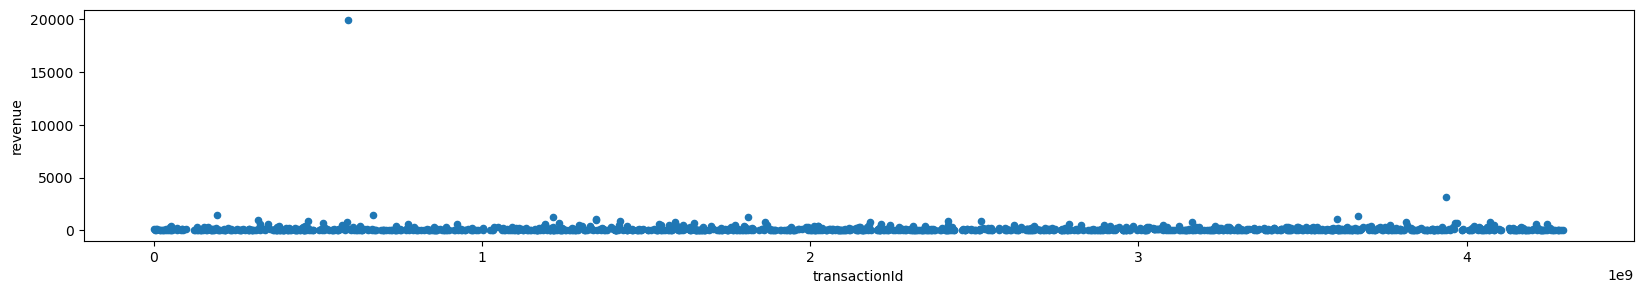

In [44]:
#Plotting a scatter plot to visualize order price.
orders.plot.scatter(x ='transactionId', y='revenue')

<span style="color:blue">Looks like there are a few orders that were out of the ordinary</span>

### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [45]:
#Calculating the price of orders for the 95th and 99th percentile. 
print(np.percentile(orders['revenue'], [95,99]))

[435.54  900.904]


<span style="color:blue">No more than 5% of orders costed more than 435.54 dollars. And no more than 1% of orders costed more than 900.90 dollars. I would conclude that orders costing more than 435.54 are anomolies.</span>

### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

<span style="color:blue">

- H0:The groups' conversion rates do not have a statistically significant differences
- H1: The groups' conversion rates have a statistically significant differences
</span>


In [46]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [47]:
orders.head(2)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B


In [48]:
#variables that store a list of users for their respective groups that made more than one purchase
orders_by_usersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
orders_by_usersA.columns = ['visitor_id', 'purchases']

orders_by_usersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
orders_by_usersB.columns = ['visitor_id', 'purchases']

In [49]:
# Adding in those who didnt make any purchases
sampleA = pd.concat(
        [orders_by_usersA['purchases'],
        pd.Series(0, index=np.arange(visits[visits['group'] =='A']['visits'].sum() - 
                                    len(orders_by_usersA['purchases'])),
                 name='orders')],axis=0)

sampleB = pd.concat(
        [orders_by_usersB['purchases'],
        pd.Series(0, index=np.arange(visits[visits['group'] =='B']['visits'].sum() - 
                                    len(orders_by_usersB['purchases'])),
                 name='orders')],axis=0)


In [50]:
#Calculating the statistical significance 
print('p-value:',"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
#the conversion gain for group B
print('conversion gain for group B:',"{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-value: 0.01679
conversion gain for group B: 0.138


<span style="color:blue">The p-value, 0.017, is lower than 0.05, so we reject the null hypothesis. The raw data analysis showed that the groups' conversion rates have a statistically significant differences. The relative conversion gain for group B compared with group A is 13.8%.   </span>

### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

<span style="color:blue">

- H0:The groups' average order size do not have a statistically significant differences
- H1: The groups' average order size have a statistically significant differences
</span>


In [51]:
#Calculating the statistical significance(P-value)
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
#The relative conversion gain for group B 
print('relative conversion gain for group B:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.692
relative conversion gain for group B: 0.252


<span style="color:blue">The p-value, 0.692, is considerably higher than 0.05, so we can not reject the null hypothesis. The raw data analysis showed that the groups' average orders size have statistically significant differences. The relative relative difference is 25.2%.</span>

### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

<span style="color:blue">

- H0:The groups' conversion rates do not have a statistically significant differences
- H1: The groups' conversion rates have a statistically significant differences
</span>

In [52]:
#Users with many orders 
users_with_many_orders = pd.concat([
        orders_by_usersA[orders_by_usersA['purchases']>2]['visitor_id'],
        orders_by_usersA[orders_by_usersA['purchases']>2]['visitor_id']],axis=0)

#users with expensive orders
users_with_expensive_order = orders[orders['revenue'] > 435.54]['visitorId']

#combined them
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_order], 
                           axis=0).drop_duplicates().sort_values()

In [53]:
#How many anomalies are there 
abnormal_users.shape

(68,)

In [54]:
#calculate the statistical significance of the differences in conversion between the groups,
#using filtered data.

#samples of the number of orders per user for each test group
sampleAfiltered = pd.concat([
        orders_by_usersA[np.logical_not(orders_by_usersA['visitor_id'].isin(abnormal_users))]['purchases'],
        pd.Series(0, index=np.arange(visits[visits['group'] =='A']['visits'].sum() - len(orders_by_usersA['purchases'])),
                 name='orders')],axis=0)

sampleBfiltered = pd.concat([
        orders_by_usersB[np.logical_not(orders_by_usersB['visitor_id'].isin(abnormal_users))]['purchases'],
        pd.Series(0, index=np.arange(visits[visits['group'] =='B']['visits'].sum() - len(orders_by_usersB['purchases'])),
                 name='orders')],axis=0)

In [55]:
#Calculating the statistical significance 
print('p-value',"{0:.3f}".format(stats.mannwhitneyu(sampleAfiltered, sampleBfiltered)[1]))
#the relative gain for group B
print('relative gain for group B',"{0:.3f}".format(sampleBfiltered.mean()/sampleAfiltered.mean()-1))

p-value 0.011
relative gain for group B 0.204


<span style="color:blue">The p-values(0.011) is lower than 0.05, so we reject the null hypothesis. The filtered data analysis showed that the groups' conversion rates have a statistically significant differences. The relative  gain for group B compared with group A is 20.4% higher.</span>


### Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.


<span style="color:blue">

- H0:The groups' average order size do not have a statistically significant differences
- H1: The groups' average order size have a statistically significant differences
</span>

In [56]:
#Calculating the statistical significance(P-value) for the filtered data
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'])[1]))

print('relative conversion gain for group B:','{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId']
                                                              .isin(abnormal_users)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean() - 1))



p-value: 0.824
relative conversion gain for group B: -0.016


<span style="color:blue">The p-values, 0.824, is significantly higher than 0.05, so we can not reject the null hypothesis. The filtered data analysis showed that the groups' average order size have a statistically significant differences. The relative  gain for group B compared with group A is 1.6% lower.</span>

### Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

<span style="color:blue">In conclusion, the results of the data analysis project for the big online store revealed that group B had a 2% higher conversion rate compared to group A, and generated higher revenue at the end of the trial. Both the raw and filtered data showed a statistically significant difference in conversion between the two groups, with group B having better results. Additionally, there was a statistically significant difference in the average purchase size between the groups, even after removing the anomalies. The graph of the difference in conversion showed that group B had a better positive performance, while group A had an initial decrease before stabilizing slightly above the mean. The graph of the difference in average purchase size showed fluctuations, making it difficult to draw definite conclusions. Based on these findings, it is recommended to stop the test and declare it a success, and move on to the next hypothesis.</span>